In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/content/World GDP Dataset.csv")
df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.000,0.000,0.000
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

GDP, current prices (Billions of U.S. dollars)    33
1980                                              34
1981                                              34
1982                                              34
1983                                              34
1984                                              34
1985                                              34
1986                                              34
1987                                              34
1988                                              34
1989                                              34
1990                                              34
1991                                              34
1992                                              34
1993                                              34
1994                                              34
1995                                              34
1996                                              34
1997                                          

In [5]:
df.dropna(inplace=True)

In [6]:
df = df.replace([0.000000], min(filter(lambda x: x > 0, df["1980"])))

In [7]:
df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.032,0.032,0.032
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,232.888,236.795,252.146,277.071,303.091,327.873,342.941,366.201,413.808,469.620
192,West Bank and Gaza,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,13.990,13.972,15.405,16.128,16.277,17.134,15.532,18.037,18.818,19.398
193,Yemen,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,43.229,42.444,31.318,26.842,21.606,21.888,18.850,19.911,27.594,28.099
194,Zambia,4.246,4.385,4.232,3.653,3.003,2.848,1.962,2.431,4.095,...,27.145,21.245,20.965,25.874,26.312,23.309,18.111,21.313,27.025,28.798


In [8]:
df.isnull().sum()

GDP, current prices (Billions of U.S. dollars)    0
1980                                              0
1981                                              0
1982                                              0
1983                                              0
1984                                              0
1985                                              0
1986                                              0
1987                                              0
1988                                              0
1989                                              0
1990                                              0
1991                                              0
1992                                              0
1993                                              0
1994                                              0
1995                                              0
1996                                              0
1997                                              0
1998        

In [9]:
df


,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.032,0.032,0.032
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,232.888,236.795,252.146,277.071,303.091,327.873,342.941,366.201,413.808,469.620
192,West Bank and Gaza,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,13.990,13.972,15.405,16.128,16.277,17.134,15.532,18.037,18.818,19.398
193,Yemen,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,43.229,42.444,31.318,26.842,21.606,21.888,18.850,19.911,27.594,28.099
194,Zambia,4.246,4.385,4.232,3.653,3.003,2.848,1.962,2.431,4.095,...,27.145,21.245,20.965,25.874,26.312,23.309,18.111,21.313,27.025,28.798


In [9]:
df.rename(columns = {"GDP, current prices (Billions of U.S. dollars)":"Country_GDP(Billion US Dollars)"})

,Country_GDP(Billion US Dollars),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.032,0.032,0.032
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,232.888,236.795,252.146,277.071,303.091,327.873,342.941,366.201,413.808,469.620
192,West Bank and Gaza,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,13.990,13.972,15.405,16.128,16.277,17.134,15.532,18.037,18.818,19.398
193,Yemen,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,43.229,42.444,31.318,26.842,21.606,21.888,18.850,19.911,27.594,28.099
194,Zambia,4.246,4.385,4.232,3.653,3.003,2.848,1.962,2.431,4.095,...,27.145,21.245,20.965,25.874,26.312,23.309,18.111,21.313,27.025,28.798


In [10]:
dft = df.T

In [11]:
dft.columns = dft.iloc[0]

In [12]:
dft = dft.iloc[1:]


In [14]:
list(dft)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 

In [15]:
dft

"GDP, current prices (Billions of U.S. dollars)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1980,0.032,1.946,42.346,0.032,6.639,0.131,233.696,0.032,0.032,162.821,...,2857.325,12.165,0.032,0.121,69.841,35.357,0.032,0.032,4.246,0.032
1981,0.032,2.229,44.372,0.032,6.214,0.148,189.802,0.032,0.032,188.29,...,3207.025,13.578,0.032,0.114,78.367,17.617,0.032,0.032,4.385,0.032
1982,0.032,2.296,44.78,0.032,6.214,0.164,94.25,0.032,0.032,186.93,...,3343.8,11.1,0.032,0.114,79.998,23.369,0.032,0.032,4.232,0.032
1983,0.032,2.319,47.529,0.032,6.476,0.182,116.267,0.032,0.032,179.364,...,3634.025,6.093,0.032,0.117,79.672,35.204,0.032,0.032,3.653,0.032
1984,0.032,2.29,51.513,0.032,6.864,0.208,130.544,0.032,0.032,197.011,...,4037.65,5.794,0.032,0.144,57.826,61.171,0.032,0.032,3.003,0.032
1985,0.032,2.339,61.132,0.032,8.457,0.241,98.599,0.032,0.032,174.274,...,4339.0,5.662,0.032,0.132,59.865,19.045,0.032,0.032,2.848,0.032
1986,0.032,2.587,61.535,0.032,7.918,0.29,118.565,0.032,0.032,181.362,...,4579.625,7.029,0.032,0.128,60.877,43.009,0.032,0.032,1.962,0.032
1987,0.032,2.566,63.3,0.032,9.05,0.337,121.561,0.032,0.032,212.964,...,4855.25,8.794,0.032,0.139,46.854,53.385,0.032,0.032,2.431,0.032
1988,0.032,2.53,51.664,0.032,9.818,0.399,142.386,0.032,0.032,270.916,...,5236.425,9.098,0.032,0.158,60.378,29.501,0.032,0.032,4.095,0.032
1989,0.032,2.779,52.558,0.032,11.421,0.439,91.352,0.032,0.032,308.103,...,5641.6,9.589,0.032,0.154,44.672,7.991,0.032,0.032,4.365,0.032


In [13]:
#dividing by continents
# Lists for each continent
asia_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh','Bhutan', 'Brunei Darussalam', 'Cambodia', 'China, People\'s Republic of','Cyprus', 'Georgia', 'Hong Kong SAR', 'India', 'Indonesia', 'Iran',
    'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Korea, Republic of','Kuwait', 'Kyrgyz Republic', 'Lao P.D.R.', 'Lebanon', 'Macao SAR','Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
    'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore','Sri Lanka', 'Syria', 'Taiwan Province of China', 'Tajikistan','Thailand', 'Timor-Leste', 'Türkiye, Republic of', 'Turkmenistan', 'United Arab Emirates',
    'Uzbekistan', 'Vietnam', 'Yemen'
]europe_countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium','Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus','Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France','Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg','Malta', 'Moldova', 'Montenegro', 'Netherlands','North Macedonia ', 'Norway', 'Poland', 'Portugal', 'Romania','Russian Federation',
    'San Marino', 'Serbia', 'Slovak Republic','Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine','United Kingdom',
]
north_america_countries = [
    'Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Belize','Canada', 'Costa Rica', 'Dominica', 'Dominican Republic','El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica',
    'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'
]

south_america_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay',
    'Venezuela'
]

africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
    'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo, Dem. Rep. of the', 'Congo, Republic of ',
    'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea',
    'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
    'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
    'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
    'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe',
    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan, Republic of', 'Sudan', 'Tanzania', 'Togo', 'Tunisia',
    'Uganda', 'Zambia', 'Zimbabwe'
]

oceania_countries = [
    'Australia', 'Fiji', 'Kiribati', 'Marshall Islands',
    'Micronesia, Fed. States of', 'Nauru', 'New Zealand', 'Palau',
    'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu',
    'Vanuatu'
]


In [15]:
df_asian = dft[asia_countries]

In [16]:
df_asian.describe()



"GDP, current prices (Billions of U.S. dollars)",Afghanistan,Armenia,Azerbaijan,Bahrain,Bangladesh,Bhutan,Brunei Darussalam,Cambodia,"China, People's Republic of",Cyprus,...,Taiwan Province of China,Tajikistan,Thailand,Timor-Leste,"Türkiye, Republic of",Turkmenistan,United Arab Emirates,Uzbekistan,Vietnam,Yemen
count,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,...,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000
unique,20.000,33.000,33.000,44.000,44.000,44.000,40.000,39.000,44.000,44.000,...,44.000,33.000,44.000,25.000,44.000,33.000,44.000,33.000,44.000,35.000
top,0.032,0.032,0.032,3.593,24.775,0.123,0.032,0.032,303.004,2.314,...,42.285,0.032,33.422,0.032,96.596,0.032,40.415,0.032,35.357,0.032
freq,25.000,12.000,12.000,1.000,1.000,1.000,5.000,6.000,1.000,1.000,...,1.000,12.000,1.000,20.000,1.000,12.000,1.000,12.000,1.000,10.000


In [17]:
asian_series = df_asian.mean().sort_values(ascending = False)
df_asian.rename(columns = {"China, People's Republic of":"China"},inplace = True)
asian_series.head(10)

<ipython-input-17-a9d175697d4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asian.rename(columns = {"China, People's Republic of":"China"},inplace = True)


GDP, current prices (Billions of U.S. dollars)
China, People's Republic of    4806.760159
Japan                          4125.041295
India                          1123.129318
Korea, Republic of              807.831023
Indonesia                       470.119636
Türkiye, Republic of            450.830182
Iran                            419.923682
Saudi Arabia                    371.316591
Taiwan Province of China        349.510023
Thailand                        230.047364
dtype: object

In [18]:
asian_top10 = pd.DataFrame(df_asian, columns = ['China','Japan','India','Korea, Republic of','Indonesia','Türkiye, Republic of','Iran','Saudi Arabia','Taiwan Province of China','Thailand'])

In [19]:
asian_top10.reset_index(inplace = True)

In [20]:
asian_top10.drop(['index'],axis = 1,inplace = True)

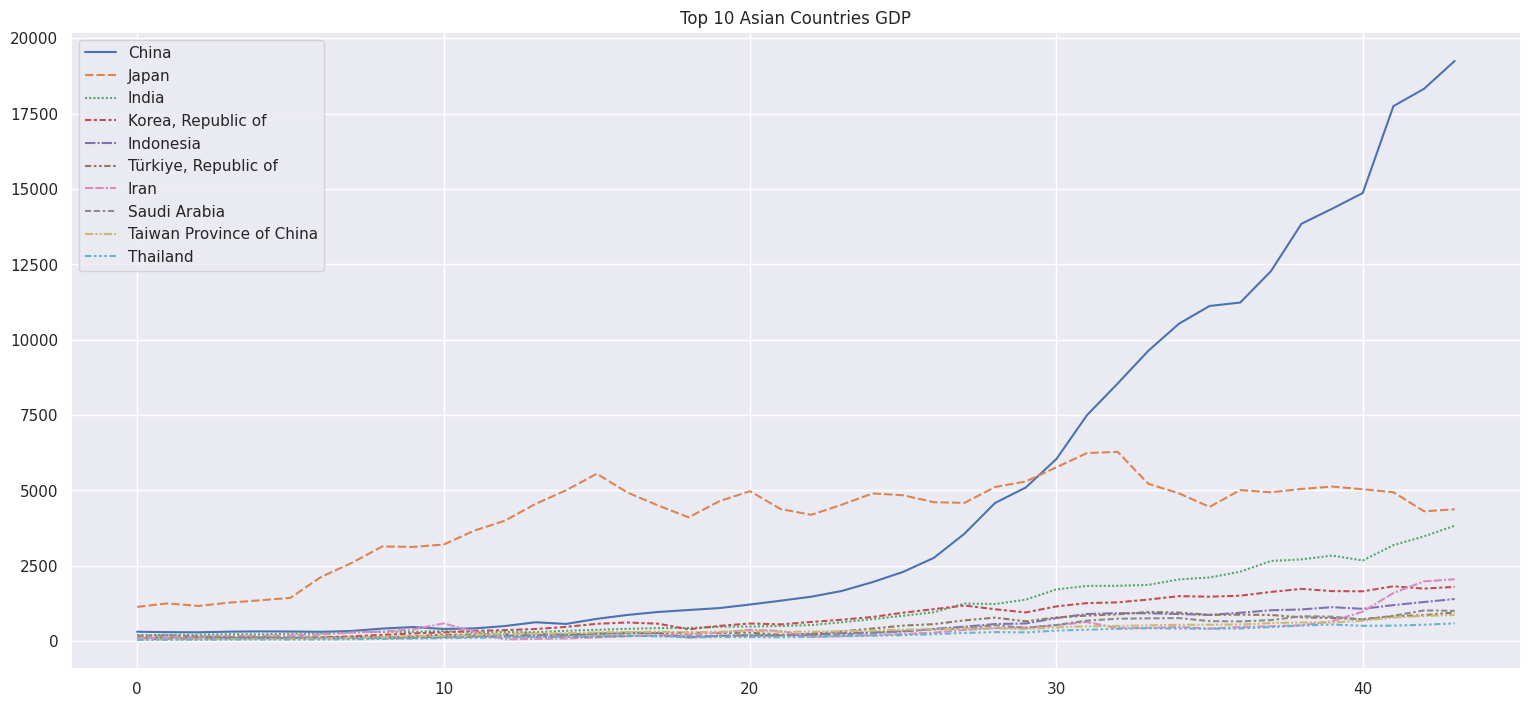

In [21]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = asian_top10).set(title='Top 10 Asian Countries GDP')
plt.savefig("asian lineplot")

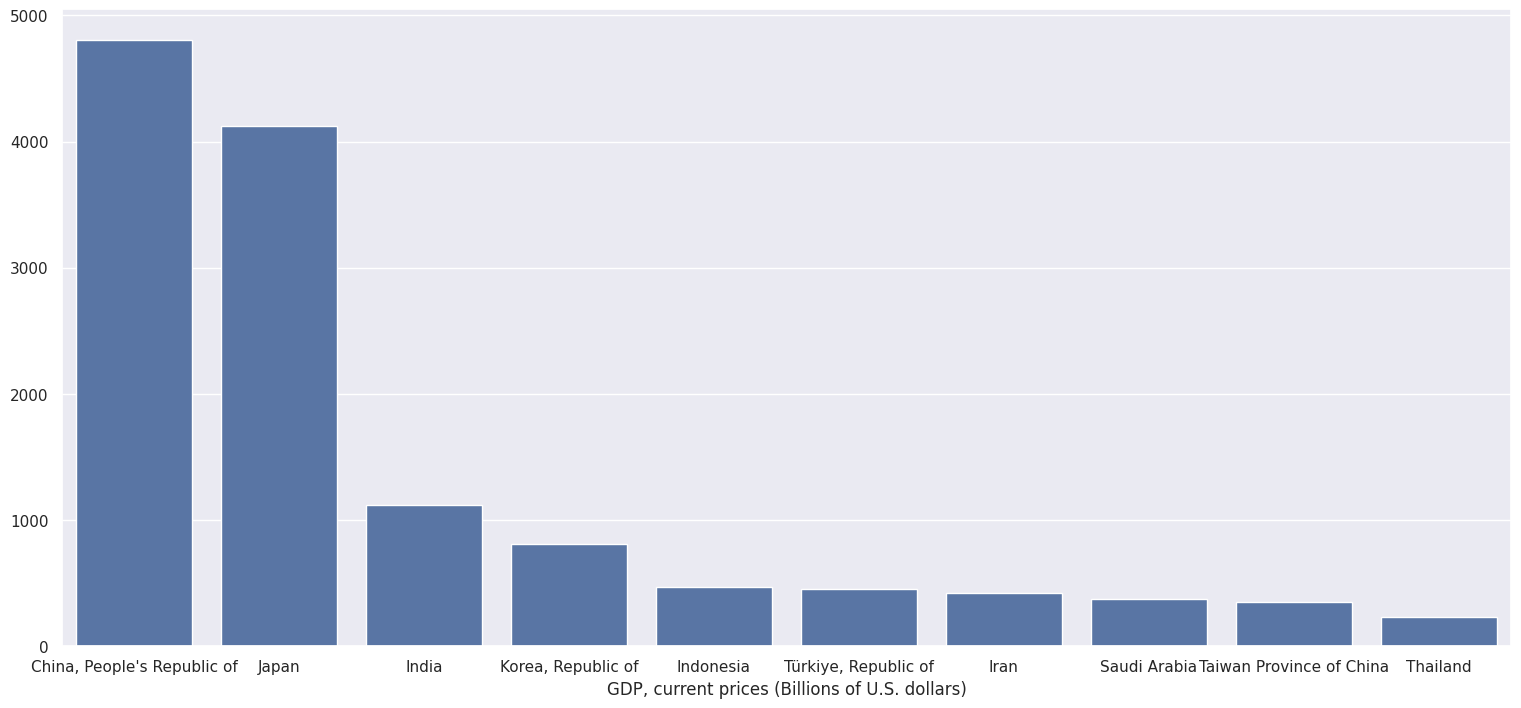

In [22]:
sns.barplot(data = asian_series.head(10))
plt.savefig("asian barplot")

In [23]:
df_europe = dft[europe_countries]
df_europe.describe()


"GDP, current prices (Billions of U.S. dollars)",Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,...,Russian Federation,San Marino,Serbia,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
count,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,...,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000
unique,44.000,25.000,44.000,33.000,44.000,29.000,44.000,33.000,44.000,30.000,...,35.000,25.000,28.000,32.000,33.000,44.000,44.000,44.000,31.000,44.000
top,1.946,0.032,80.923,0.032,123.478,0.032,32.352,0.032,2.314,0.032,...,0.032,0.032,0.032,0.032,0.032,230.759,140.384,122.466,0.032,603.601
freq,1.000,20.000,1.000,12.000,1.000,16.000,1.000,12.000,1.000,15.000,...,10.000,20.000,17.000,13.000,12.000,1.000,1.000,1.000,14.000,1.000


In [24]:
europe_series = df_europe.mean().sort_values(ascending = False)
europe_series.head(10)

GDP, current prices (Billions of U.S. dollars)
Germany               2528.186023
United Kingdom        1921.354682
France                1834.925159
Italy                 1461.670136
Spain                  871.967318
Russian Federation     860.814432
Netherlands            569.214182
Switzerland            424.843455
Sweden                 357.405341
Belgium                332.860318
dtype: object

In [25]:
europe_top10 = pd.DataFrame(df_europe, columns = ['Germany','United Kingdom','France','Italy','Spain','Russian Federation','Netherlands','Switzerland','Sweden','Belgium'])
europe_top10.reset_index(inplace = True)
europe_top10.drop(['index'],axis = 1,inplace = True)

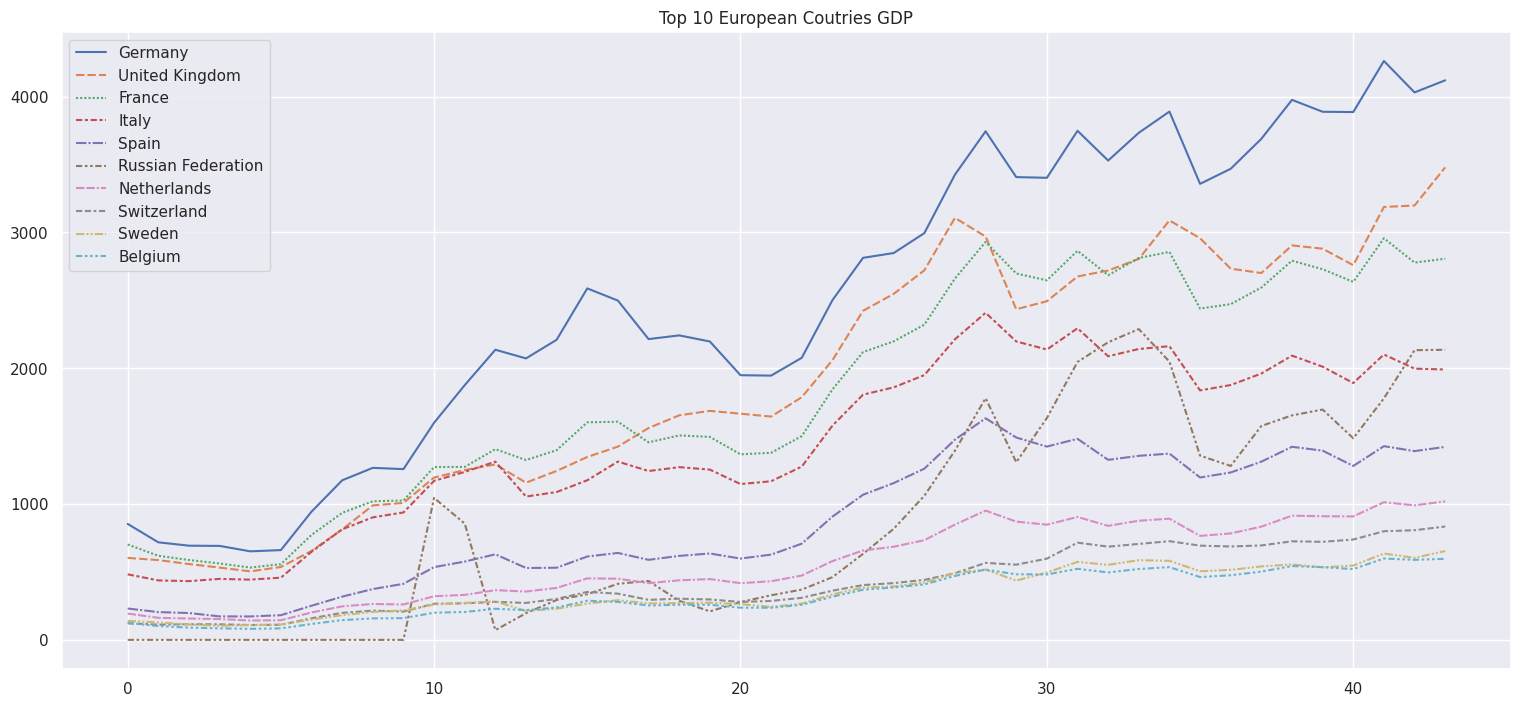

In [48]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = europe_top10).set(title='Top 10 European Coutries GDP')
plt.savefig("European lineplot")

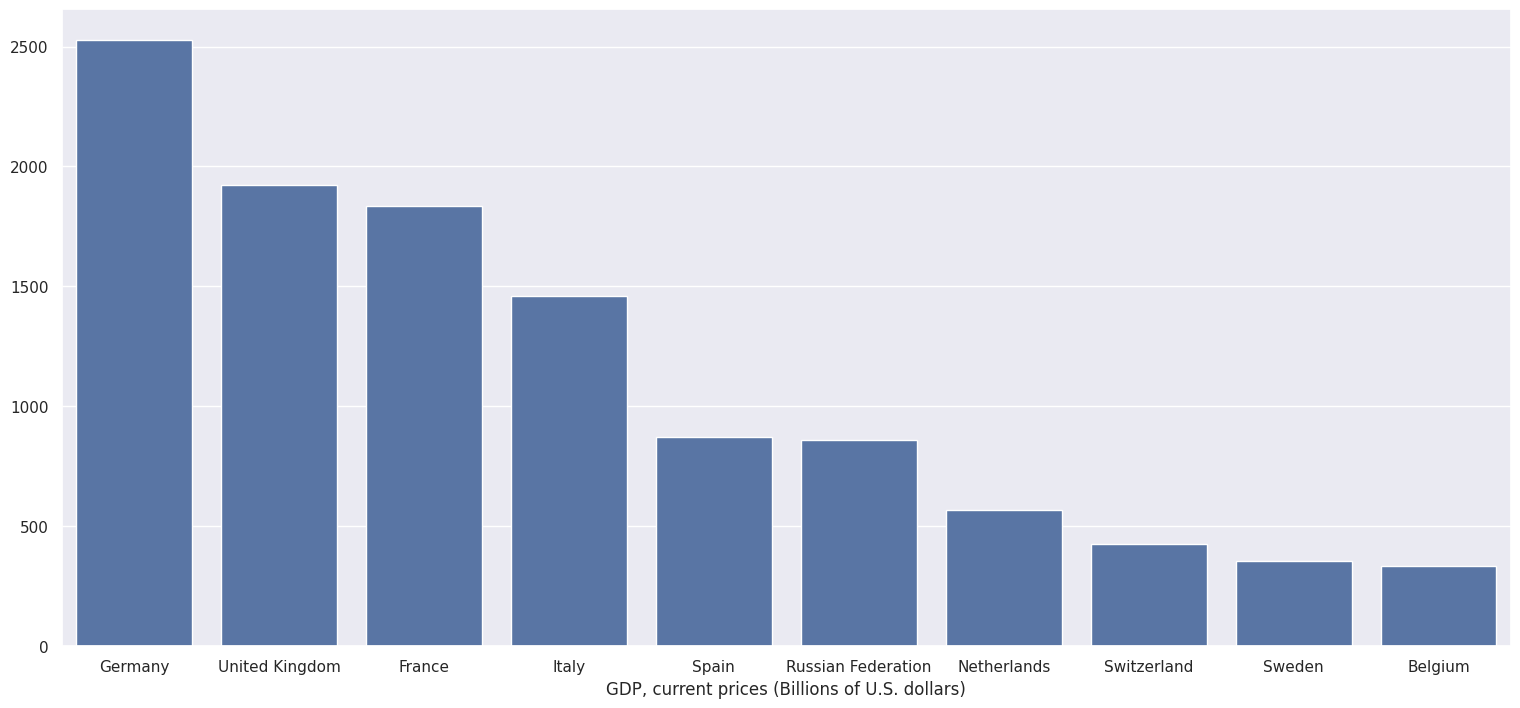

In [27]:
sns.barplot(data = europe_series.head(10))
plt.savefig("European barplot")

In [28]:
df_north_america = dft[north_america_countries]
df_north_america.describe()

"GDP, current prices (Billions of U.S. dollars)",Antigua and Barbuda,"Bahamas, The",Barbados,Belize,Canada,Costa Rica,Dominica,Dominican Republic,El Salvador,Grenada,...,Honduras,Jamaica,Mexico,Nicaragua,Panama,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Trinidad and Tobago,United States
count,44.00,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.00,...,44.000,44.000,44.000,44.000,44.000,44.000,44.00,44.000,44.000,44.000
unique,43.00,44.000,43.000,43.000,44.000,44.000,43.000,44.000,44.000,41.00,...,44.000,44.000,44.000,44.000,44.000,44.000,44.00,42.000,43.000,44.000
top,1.37,2.598,4.677,0.232,276.064,4.854,0.333,8.672,3.912,0.52,...,3.968,2.565,228.606,1.832,4.104,0.058,0.17,0.714,29.337,2857.325
freq,2.00,1.000,2.000,2.000,1.000,1.000,2.000,1.000,1.000,2.00,...,1.000,1.000,1.000,1.000,1.000,1.000,1.00,3.000,2.000,1.000


In [29]:
north_america_series = df_north_america.mean().sort_values(ascending = False)
north_america_series.head(10)

GDP, current prices (Billions of U.S. dollars)
United States          11777.348273
Canada                  1052.898886
Mexico                   737.411932
Dominican Republic        38.529455
Guatemala                  32.85925
Costa Rica                26.388386
Panama                    24.758409
Trinidad and Tobago       14.254159
El Salvador               13.783886
Honduras                  12.013932
dtype: object

In [30]:
north_america_top10 = pd.DataFrame(df_north_america, columns = ['United States','Canada','Mexico','Dominican Republic','Guatemala','Costa Rica','Panama','Trinidad and Tobago','El Salvador','Honduras'])
north_america_top10.reset_index(inplace = True)
north_america_top10.drop(['index'],axis = 1,inplace = True)

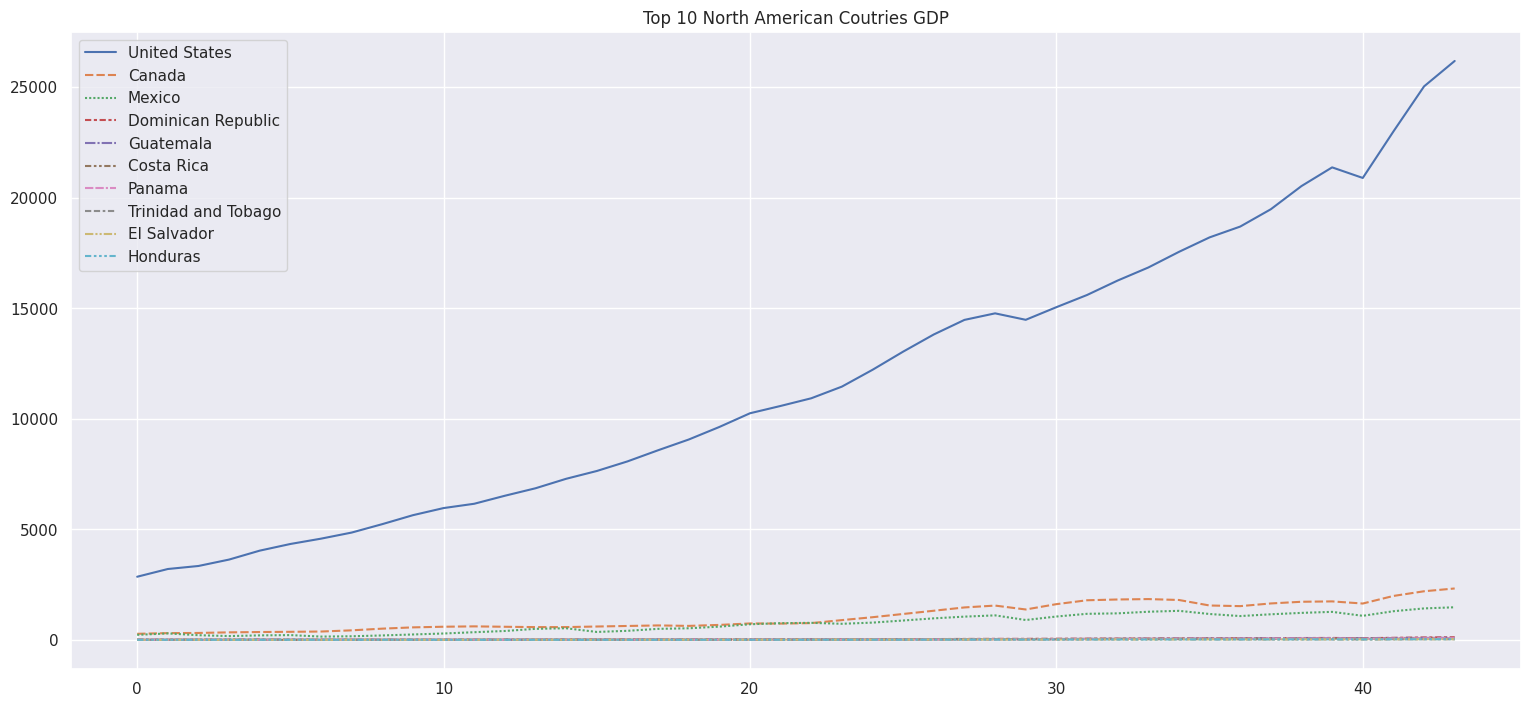

In [31]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = north_america_top10).set(title='Top 10 North American Coutries GDP')
plt.savefig("NorthAmerican lineplot")

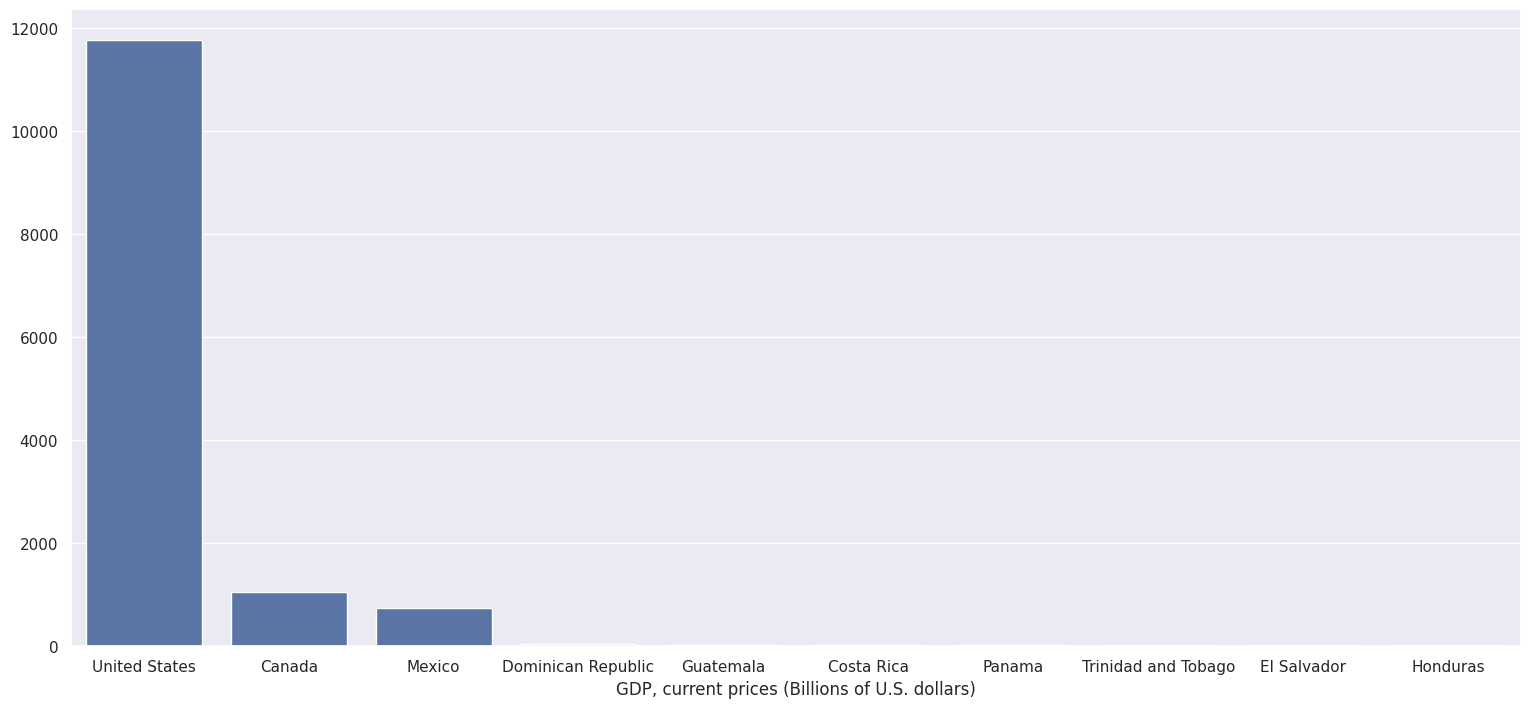

In [32]:
sns.barplot(data = north_america_series.head(10))
plt.savefig("Northamerican barplot")

In [33]:
df_south_america = dft[south_america_countries]
df_south_america.describe()

"GDP, current prices (Billions of U.S. dollars)",Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela
count,44.000,44.000,44.000,44.000,44.000,44.00,44.000,44.000,44.00,44.000,44.000,44.000
unique,44.000,44.000,44.000,44.000,44.000,44.00,44.000,44.000,44.00,44.000,44.000,43.000
top,233.696,3.589,145.819,29.025,46.482,16.84,0.842,4.095,20.19,1.276,12.165,59.865
freq,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.00,1.000,1.000,2.000


In [34]:
south_america_series = df_south_america.mean().sort_values(ascending = False)
south_america_series.head(10)

GDP, current prices (Billions of U.S. dollars)
Brazil       1065.640841
Argentina     323.170614
Colombia        171.1835
Chile         134.120409
Venezuela     120.209614
Peru           99.910795
Ecuador        48.892795
Uruguay        30.816909
Paraguay       17.821886
Bolivia        16.031886
dtype: object

In [35]:
south_america_top10 = pd.DataFrame(df_south_america, columns = ['Brazil','Argentina','Colombia','Chile','Venezuela','Peru','Ecuador','Uruguay','Paraguay','Bolivia'])
south_america_top10.reset_index(inplace = True)
south_america_top10.drop(['index'],axis = 1,inplace = True)

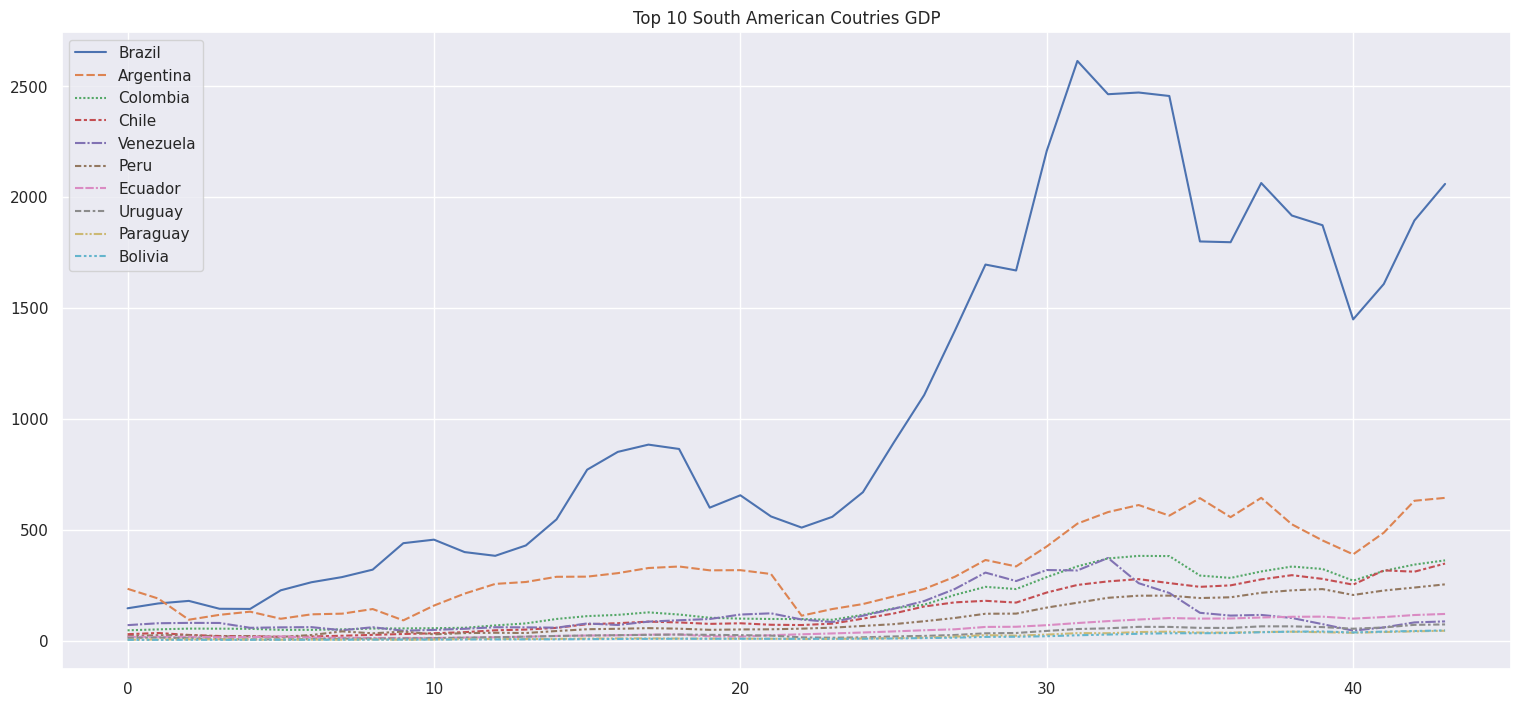

In [36]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = south_america_top10).set(title='Top 10 South American Coutries GDP')
plt.savefig("Southamerican lineplot")

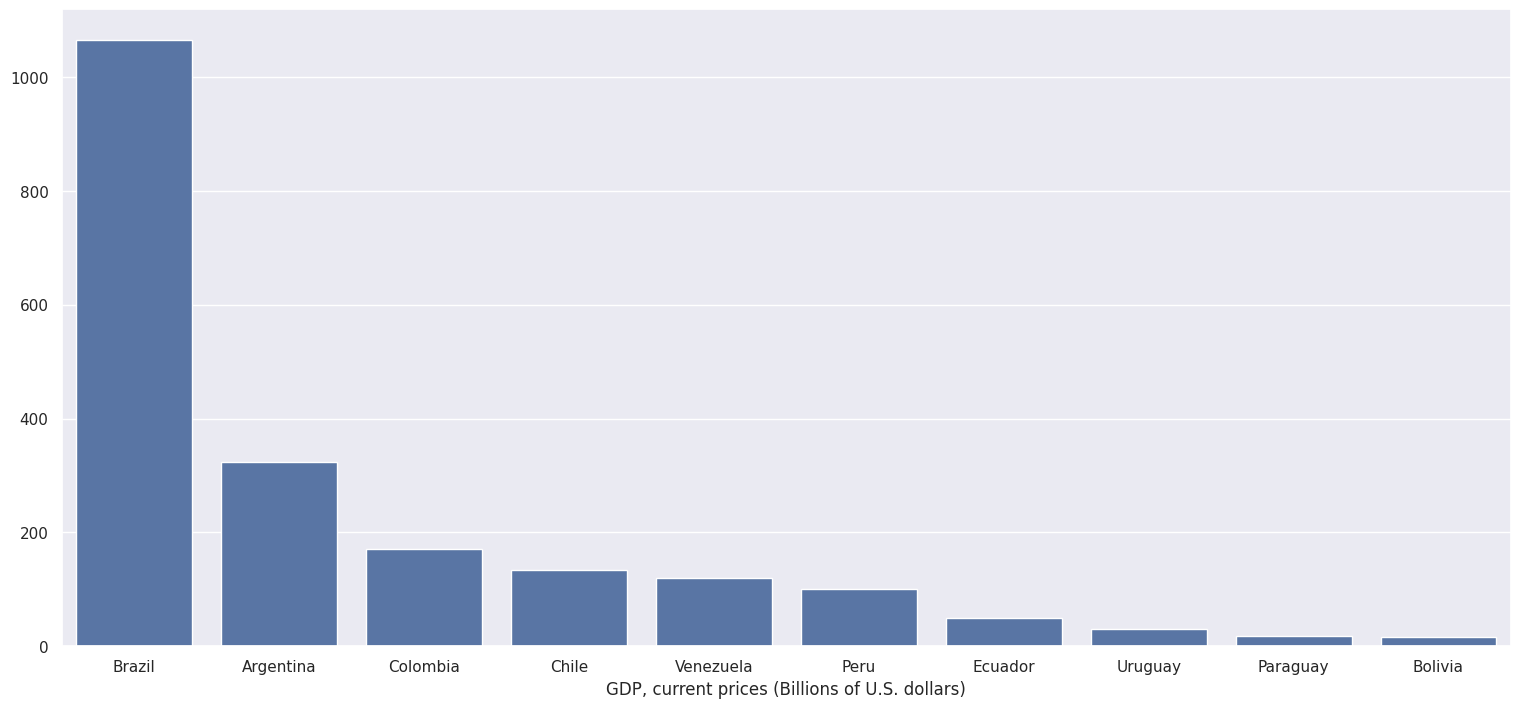

In [37]:
sns.barplot(data = south_america_series.head(10))
plt.savefig("Southamerican barplot")

In [38]:
df_africa = dft[africa_countries]
df_africa.describe()

"GDP, current prices (Billions of U.S. dollars)",Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Republic,Chad,...,Somalia,South Africa,"South Sudan, Republic of",Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
count,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.00,44.000,44.000,...,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000
unique,44.000,43.000,44.000,44.000,43.000,43.000,43.000,44.00,44.000,43.000,...,14.000,44.000,14.000,44.000,44.000,44.000,44.000,44.000,44.000,35.000
top,42.346,6.214,2.302,1.174,2.942,1.131,0.152,8.85,0.714,0.844,...,0.032,89.412,0.032,9.095,10.873,1.994,9.566,7.486,4.246,0.032
freq,1.000,2.000,1.000,1.000,2.000,2.000,2.000,1.00,1.000,2.000,...,31.000,1.000,31.000,1.000,1.000,1.000,1.000,1.000,1.000,10.000


In [39]:
africa_series = df_africa.mean().sort_values(ascending = False)
africa_series.head(10)

GDP, current prices (Billions of U.S. dollars)
South Africa               235.981023
Nigeria                      210.0465
Egypt                      159.795227
Algeria                    102.526023
Morocco                     68.154227
Angola                      47.300227
Libya                         44.4905
Kenya                       38.922886
Ghana                       35.424114
Congo, Dem. Rep. of the     34.309023
dtype: object

In [40]:
africa_top10 = pd.DataFrame(df_africa, columns = ['South Africa','Nigeria','Egypt','Algeria','Morocco','Angola','Libya','Kenya','Ghana','Congo, Dem. Rep. of the'])
africa_top10.reset_index(inplace = True)
africa_top10.drop(['index'],axis = 1,inplace = True)

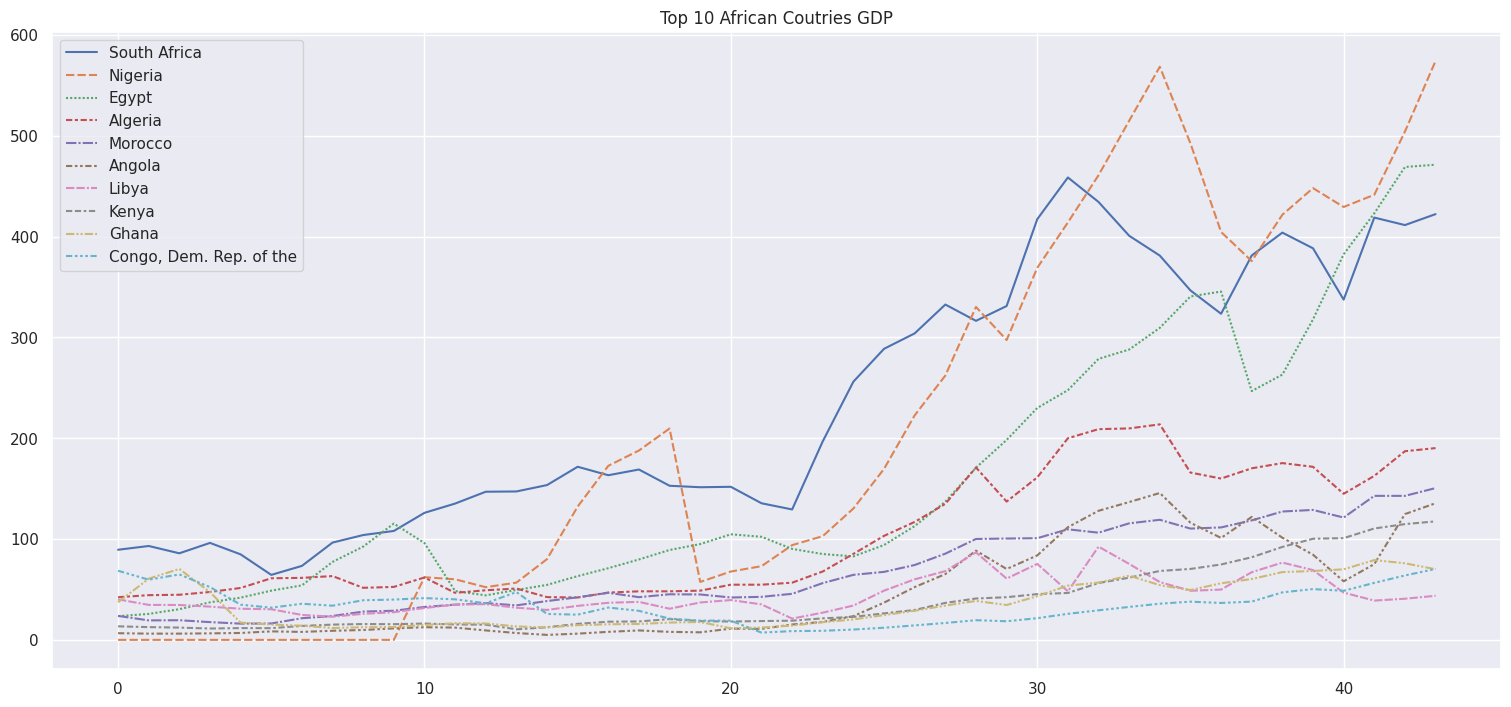

In [41]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = africa_top10).set(title='Top 10 African Coutries GDP')
plt.savefig("African lineplot")

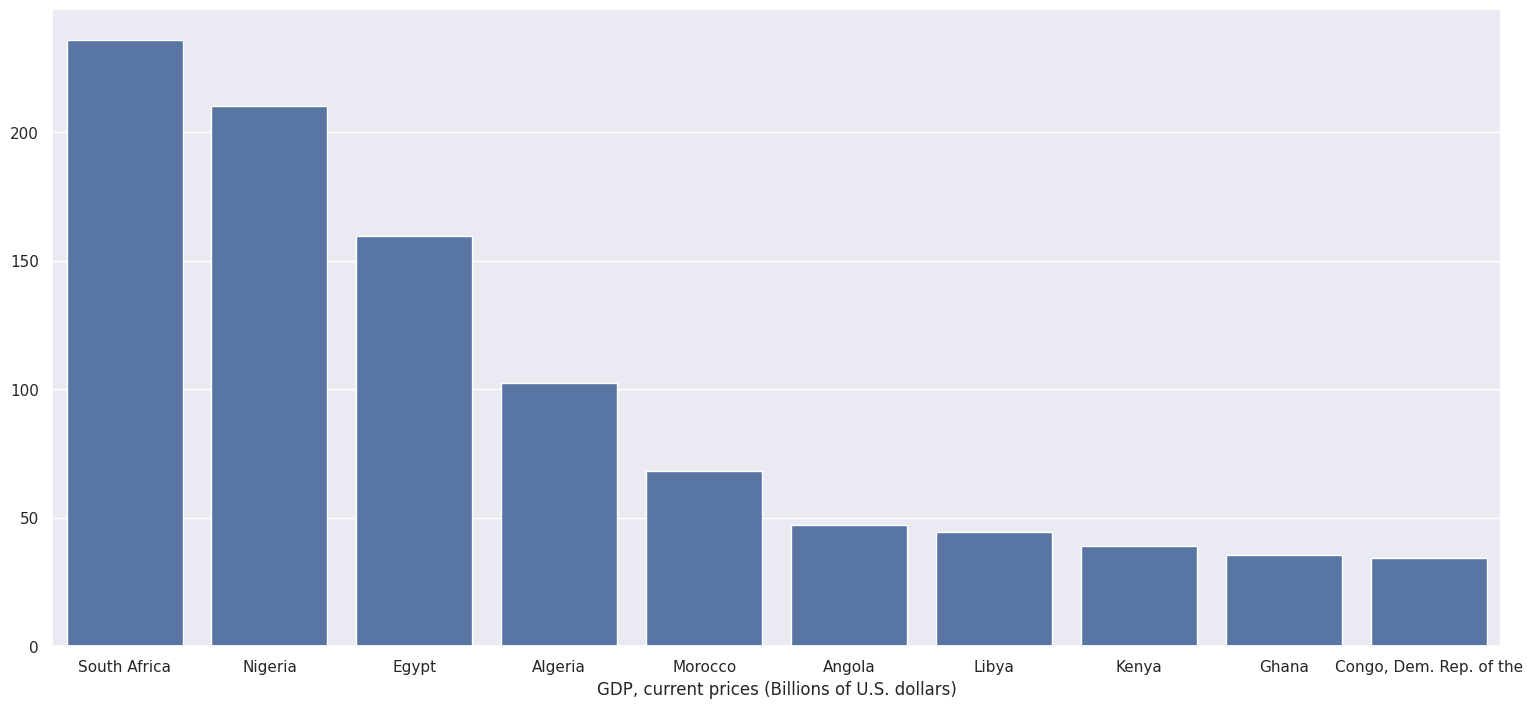

In [42]:
sns.barplot(data = africa_series.head(10))
plt.savefig("African barplot")

In [43]:

df_oceania = dft[oceania_countries]
df_oceania.describe()

"GDP, current prices (Billions of U.S. dollars)",Australia,Fiji,Kiribati,Marshall Islands,"Micronesia, Fed. States of",Nauru,New Zealand,Palau,Papua New Guinea,Samoa,Solomon Islands,Tonga,Tuvalu,Vanuatu
count,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000
unique,44.000,43.000,38.000,27.000,30.000,20.000,44.000,23.000,44.000,43.000,44.000,42.000,20.000,42.000
top,162.821,1.276,0.042,0.032,0.032,0.032,22.523,0.032,4.087,0.844,0.183,0.079,0.032,0.114
freq,1.000,2.000,2.000,17.000,15.000,25.000,1.000,20.000,1.000,2.000,1.000,2.000,22.000,2.000


In [44]:
oceania_series = df_oceania.mean().sort_values(ascending = False)
oceania_series.head(10)

GDP, current prices (Billions of U.S. dollars)
Australia                       753.1335
New Zealand                   104.954886
Papua New Guinea               11.559295
Fiji                            2.870841
Solomon Islands                    0.686
Vanuatu                         0.442955
Samoa                           0.441523
Tonga                           0.267818
Micronesia, Fed. States of      0.208477
Palau                           0.132205
dtype: object

In [45]:
oceania_top10 = pd.DataFrame(df_oceania, columns = ['Australia','New Zealand','Papua New Guinea','Fiji','Solomon Islands','Vanuatu','Samoa','Tonga','Micronesia, Fed. States of','Palau'])
oceania_top10.reset_index(inplace = True)
oceania_top10.drop(['index'],axis = 1,inplace = True)

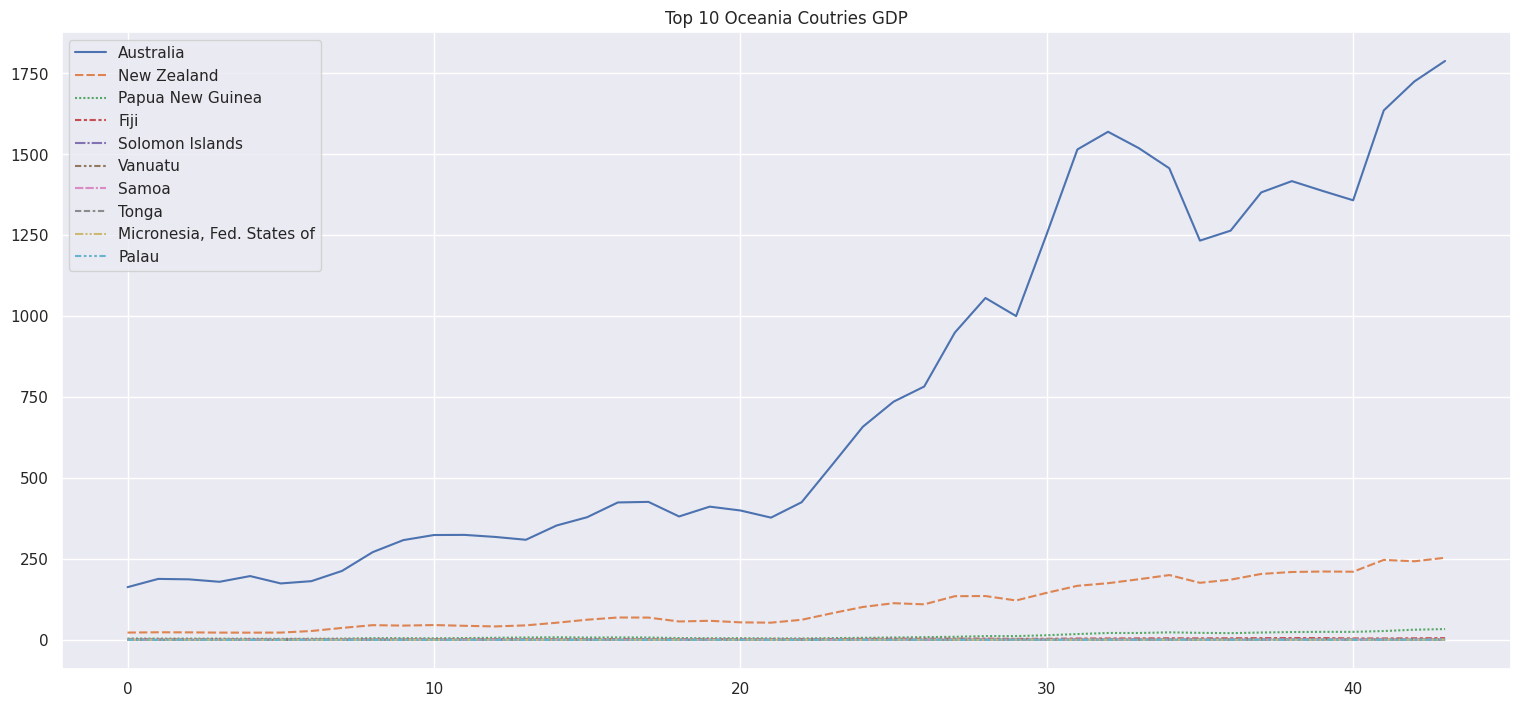

In [46]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.lineplot(data = oceania_top10).set(title='Top 10 Oceania Coutries GDP')
plt.savefig("Oceania lineplot")

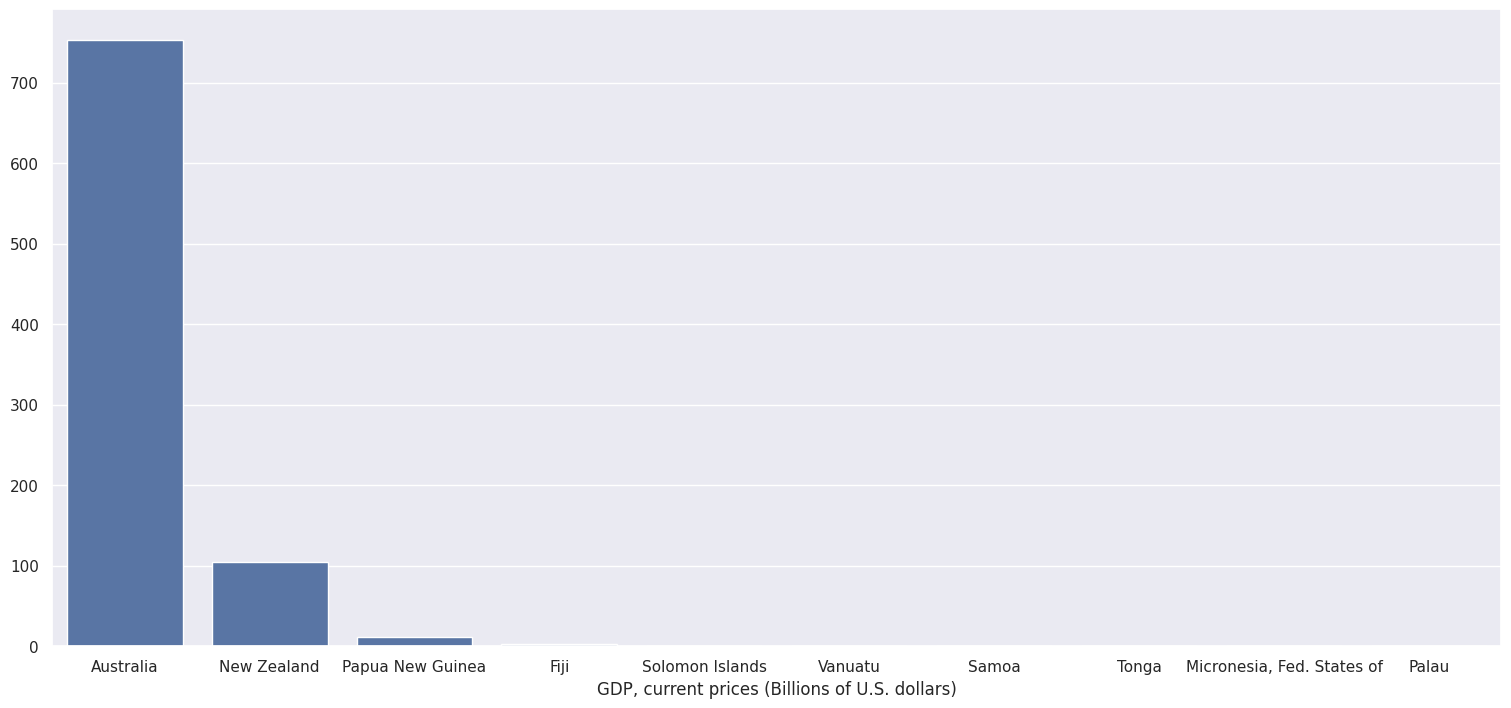

In [47]:
sns.barplot(data = oceania_series.head(10))
plt.savefig("Oceania barplot")

In [57]:
df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.032,0.032,0.032
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,232.888,236.795,252.146,277.071,303.091,327.873,342.941,366.201,413.808,469.620
192,West Bank and Gaza,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,13.990,13.972,15.405,16.128,16.277,17.134,15.532,18.037,18.818,19.398
193,Yemen,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,43.229,42.444,31.318,26.842,21.606,21.888,18.850,19.911,27.594,28.099
194,Zambia,4.246,4.385,4.232,3.653,3.003,2.848,1.962,2.431,4.095,...,27.145,21.245,20.965,25.874,26.312,23.309,18.111,21.313,27.025,28.798


In [58]:
df.set_index('GDP, current prices (Billions of U.S. dollars)', inplace=True, drop=True)
df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
"GDP, current prices (Billions of U.S. dollars)",,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.032,0.032,0.032
Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,2.779,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,52.558,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
Andorra,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,11.421,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,7.991,...,232.888,236.795,252.146,277.071,303.091,327.873,342.941,366.201,413.808,469.620
West Bank and Gaza,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,13.990,13.972,15.405,16.128,16.277,17.134,15.532,18.037,18.818,19.398
Yemen,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,43.229,42.444,31.318,26.842,21.606,21.888,18.850,19.911,27.594,28.099


In [60]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
X, y

(                                                  1980    1981    1982  \
 GDP, current prices (Billions of U.S. dollars)                           
 Afghanistan                                      0.032   0.032   0.032   
 Albania                                          1.946   2.229   2.296   
 Algeria                                         42.346  44.372  44.780   
 Andorra                                          0.032   0.032   0.032   
 Angola                                           6.639   6.214   6.214   
 ...                                                ...     ...     ...   
 Vietnam                                         35.357  17.617  23.369   
 West Bank and Gaza                               0.032   0.032   0.032   
 Yemen                                            0.032   0.032   0.032   
 Zambia                                           4.246   4.385   4.232   
 Zimbabwe                                         0.032   0.032   0.032   
 
                       

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

                                                 Actual   Predicted
GDP, current prices (Billions of U.S. dollars)                     
Portugal                                        261.173  252.429137
Micronesia, Fed. States of                        0.453   -0.008942
Belarus                                          91.985  118.695793
Hungary                                         195.631  213.872018
Sierra Leone                                      3.999   -0.877256
...                                                 ...         ...
Sweden                                          653.962  623.302599
Comoros                                           1.290    0.804512
Cameroon                                         46.017   23.511519
Lebanon                                           0.032   11.618488
Solomon Islands                                   1.702    0.789888

[65 rows x 2 columns]
